In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#Load Dataset

In [ ]:
#import dataset
#file_dir = 'D:\Sini-Project\Datasets\CalCOFI'
file1='bottle.csv'
file2 = 'cast.csv'
file3 = 'small_bottle.csv'

dataset = pd.read_csv(file1)
print(dataset.shape)
print(dataset.columns)

<ipython-input-4-d528c380b7ba>:7: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(file1)


(864863, 74)
Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')


In [ ]:
print(dataset.head())

   Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  ...  R_PHAEO  R_PRES  \
0       0   10.50  33.440     NaN  25.649    NaN  ...      NaN       0   
1       8   10.46  33.440     NaN  25.656    NaN  ...      NaN       8   
2      10   10.46  33.437     NaN  25.654    NaN  ...      NaN      10   
3      19   10.45  33.420     NaN  25.643    NaN  ...      NaN      19   
4      20   10.45  33.421     NaN  25.643    NaN  ...      NaN      20   

   R_SAMP  DIC1  DIC2  TA1  TA2  pH2  pH1  DIC Quality Comment  
0     NaN   NaN   NaN  NaN  NaN  

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [ ]:
dataset.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
train_orig_set, test_orig_set = train_test_split(dataset, test_size=0.2)
print(train_orig_set.shape)
print(test_orig_set.shape)

(691890, 74)
(172973, 74)


Prepare Data

In [ ]:
train_set = train_orig_set.loc[~train_orig_set['R_TEMP'].isna()]
print(train_set.shape)

(683223, 74)


In [ ]:
test_set = test_orig_set.loc[~test_orig_set['R_TEMP'].isna()]

In [ ]:
drop_attributes = ['Cst_Cnt','Btl_Cnt','Sta_ID', 'Depth_ID', 'BtlNum', 'IncTim', 'DIC Quality Comment']
cat_attributes =['RecInd']

In [ ]:
X_train_full = train_set.drop(['T_degC', 'R_TEMP','T_prec','T_qual','R_POTEMP'], axis=1)
X_train_full = X_train_full.drop(drop_attributes, axis=1)
X_train_full.columns

Index(['Depthm', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg',
       'RecInd', 'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq',
       'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM',
       'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1',
       'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp',
       'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'LightP', 'R_Depth',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO',
       'R_PRES', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1'],
      dtype='object')

In [ ]:
y_train_full = train_set['R_TEMP'].copy()

In [ ]:
X_test = test_set.drop(['T_degC', 'R_TEMP','T_prec','T_qual','R_POTEMP'], axis=1)
X_test = X_test.drop(drop_attributes, axis=1)
X_test.columns

Index(['Depthm', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg',
       'RecInd', 'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq',
       'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM',
       'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1',
       'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp',
       'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'LightP', 'R_Depth',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO',
       'R_PRES', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1'],
      dtype='object')

In [ ]:
y_test = test_set['R_TEMP'].copy()

In [ ]:
print(X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape)

(683223, 62) (170677, 62) (683223,) (170677,)


Handle Missing Values

In [ ]:
X_train_num = X_train_full.drop(cat_attributes, axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [ ]:
X_train_full['RecInd'].value_counts()

RecInd
3    359362
7    256762
5     64626
6      2471
4         2
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, list(X_train_num)),
    ('cat', OneHotEncoder(),  ["RecInd"])
])

In [ ]:
#Tranform data
X_train_tr = full_pipeline.fit_transform(X_train_full)
print(X_train_tr[:2, -8:])
print(X_train_tr.shape)

[[-7.97009012e-03  1.60145371e-04  2.21161193e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-7.97009012e-03  1.60145371e-04  2.21161193e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(683223, 66)


In [ ]:
X_train, X_valid = X_train_tr[100000:], X_train_tr[:100000]
y_train, y_valid = y_train_full[100000:], y_train_full[:100000]

In [ ]:
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(583223, 66) (100000, 66) (583223,) (100000,)


#Model

In [ ]:
n_features = X_train.shape[1]
print(n_features)

66


In [ ]:
model1 = keras.models.Sequential()
model1.add(keras.Input(shape=(n_features,)))
model1.add(keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'))
model1.add(keras.layers.Dense(8, activation='relu', kernel_initializer='he_normal'))
model1.add(keras.layers.Dense(1))

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                670       
                                                                 
 dense_7 (Dense)             (None, 8)                 88        
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 767 (3.00 KB)
Trainable params: 767 (3.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model

In [ ]:
model1.compile(optimizer='adam', loss='mse')

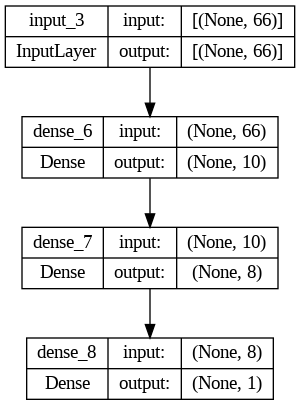

In [ ]:
keras.utils.plot_model(model1, 'model.png', show_shapes=True)

In [ ]:
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/50
18226/18226 [==============================] - 81s 4ms/step - loss: 2.8900 - val_loss: 0.7596
Epoch 2/50
18226/18226 [==============================] - 75s 4ms/step - loss: 0.5212 - val_loss: 0.3220
Epoch 3/50
18226/18226 [==============================] - 63s 3ms/step - loss: 0.3270 - val_loss: 0.2780
Epoch 4/50
18226/18226 [==============================] - 39s 2ms/step - loss: 0.2490 - val_loss: 0.2619
Epoch 5/50
18226/18226 [==============================] - 57s 3ms/step - loss: 0.2370 - val_loss: 0.2415
Epoch 6/50
18226/18226 [==============================] - 41s 2ms/step - loss: 0.2230 - val_loss: 0.2422
Epoch 7/50
18226/18226 [==============================] - 46s 3ms/step - loss: 0.2272 - val_loss: 0.3181
Epoch 8/50
18226/18226 [==============================] - 38s 2ms/step - loss: 0.2161 - val_loss: 0.2429
Epoch 9/50
18226/18226 [==============================] - 41s 2ms/step - loss: 0.2091 - val_loss: 0.2166
Epoch 10/50
18226/18226 [==============================

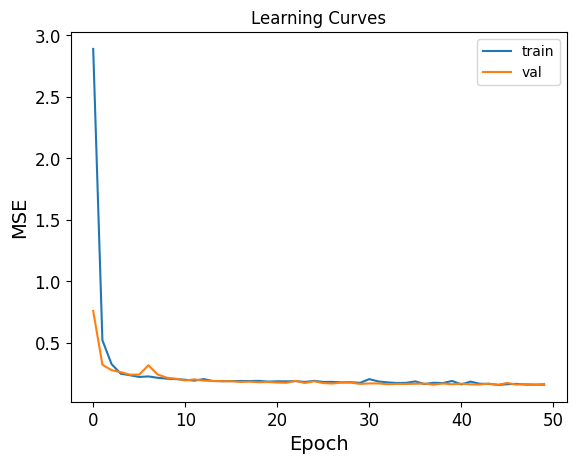

In [ ]:
from matplotlib import pyplot as plt
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='val')
plt.legend()
plt.show()

#Evaluate the model

In [ ]:
#Separate target variable, temperature and features
X_test = test_set.drop(['T_degC', 'R_TEMP','T_prec','T_qual','R_POTEMP'], axis=1)
X_test = X_test.drop(drop_attributes, axis=1)
y_test = test_set['R_TEMP'].copy()

In [ ]:
X_test_tr = full_pipeline.transform(X_test)
print(X_test_tr[:2, -8:])
print(X_test_tr.shape)

[[-7.97009012e-03  1.60145371e-04  2.21161193e-03  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-7.97009012e-03  1.60145371e-04  2.21161193e-03  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
(170677, 66)


In [ ]:
loss1= model1.evaluate(X_test_tr, y_test)

5334/5334 [==============================] - 7s 1ms/step - loss: 0.1510


In [ ]:
rmse1 = np.sqrt(loss1)

In [ ]:
print(rmse1)

0.3885411181544028


In [ ]:
import time
start = time.time()/60
pred = model1.predict(X_test_tr)
end = time.time()/60
print(end-start)

5334/5334 [==============================] - 12s 2ms/step
-0.34501810371875763


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse1 = np.sqrt(mean_squared_error(y_test, pred))

In [ ]:
print('TEST RMSE=', rmse1)

TEST RMSE= 0.38854095622716367


In [ ]:
X_test.loc[:2, :2]

KeyError: 2

In [ ]:
# Plotting
plt.scatter(pd.DataFrame(X_test[:,1]), y_test, color='blue')
plt.scatter(pd.DataFrame(X_test[:,1]), pred, color='red')
plt.title('Temperature Prediction')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

InvalidIndexError: (slice(None, None, None), 1)

In [ ]:
model2 = keras.models.Sequential()
model2.add(keras.Input(shape=(n_features,)))
model2.add(keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'))
model2.add(keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'))
model2.add(keras.layers.Dense(8, activation='relu', kernel_initializer='he_normal'))
model2.add(keras.layers.Dense(1))

In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                670       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 8)                 88        
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 877 (3.43 KB)
Trainable params: 877 (3.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.compile(optimizer='adam', loss='mse')

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/50
18226/18226 [==============================] - 43s 2ms/step - loss: 4.7317 - val_loss: 0.6780
Epoch 2/50
18226/18226 [==============================] - 42s 2ms/step - loss: 0.4206 - val_loss: 0.2689
Epoch 3/50
18226/18226 [==============================] - 41s 2ms/step - loss: 0.2328 - val_loss: 0.2338
Epoch 4/50
18226/18226 [==============================] - 40s 2ms/step - loss: 0.2210 - val_loss: 0.2204
Epoch 5/50
18226/18226 [==============================] - 41s 2ms/step - loss: 0.2086 - val_loss: 0.2267
Epoch 6/50
18226/18226 [==============================] - 40s 2ms/step - loss: 0.2004 - val_loss: 0.2031
Epoch 7/50
18226/18226 [==============================] - 41s 2ms/step - loss: 0.1864 - val_loss: 0.1874
Epoch 8/50
18226/18226 [==============================] - 42s 2ms/step - loss: 0.1928 - val_loss: 0.2139
Epoch 9/50
18226/18226 [==============================] - 40s 2ms/step - loss: 0.1718 - val_loss: 0.1838
Epoch 10/50
18226/18226 [==============================

In [ ]:
print(history2.history.keys())

dict_keys(['loss', 'val_loss'])


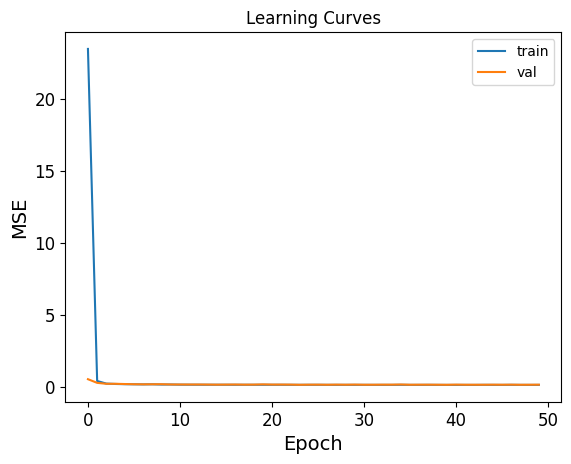

In [ ]:
from matplotlib import pyplot as plt
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='val')
plt.legend()
plt.show()

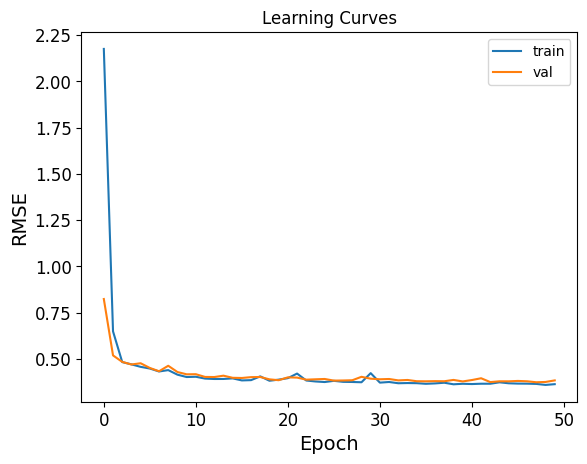

In [ ]:
from matplotlib import pyplot as plt
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.plot(np.sqrt(history2.history['loss']), label='train')
plt.plot(np.sqrt(history2.history['val_loss']), label='val')
plt.legend()
plt.show()

In [ ]:
loss2= model2.evaluate(X_test_tr, y_test)
rmse2 = np.sqrt(loss2)

5334/5334 [==============================] - 9s 2ms/step - loss: 0.1370


In [ ]:
print(rmse2)

0.3701447247650888


Clear Session

In [ ]:
keras.backend.clear_session() # clearing session
np.random.seed(42) # generating random see
tf.random.set_seed(42) # set.seed function helps reuse same set of random variables

In [ ]:
history2_2 = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/100
18226/18226 [==============================] - 39s 2ms/step - loss: 0.1241 - val_loss: 0.1437
Epoch 2/100
18226/18226 [==============================] - 39s 2ms/step - loss: 0.1262 - val_loss: 0.1342
Epoch 3/100
18226/18226 [==============================] - 41s 2ms/step - loss: 0.1278 - val_loss: 0.1435
Epoch 4/100
18226/18226 [==============================] - 39s 2ms/step - loss: 0.1247 - val_loss: 0.1391
Epoch 5/100
18226/18226 [==============================] - 42s 2ms/step - loss: 0.1271 - val_loss: 0.1340
Epoch 6/100
18226/18226 [==============================] - 42s 2ms/step - loss: 0.1244 - val_loss: 0.1375
Epoch 7/100
18226/18226 [==============================] - 40s 2ms/step - loss: 0.1225 - val_loss: 0.1317
Epoch 8/100
18226/18226 [==============================] - 38s 2ms/step - loss: 0.1214 - val_loss: 0.1348
Epoch 9/100
18226/18226 [==============================] - 40s 2ms/step - loss: 0.1244 - val_loss: 0.1332
Epoch 10/100
18226/18226 [====================

Model 2, increased epoch to 100, train loss

In [ ]:
#print(history2_2.history['loss'][-1])
print(np.sqrt(history2_2.history['loss'][-1]))

0.33043674873178625


Train data, validation RMSE

In [ ]:
#print(history2_2.history['val_loss'][-1])
print(np.sqrt(history2_2.history['val_loss'][-1]))

0.3565918921510083


Test Data - RMSE

In [ ]:
loss2_2= model2.evaluate(X_test_tr, y_test)
rmse2_2 = np.sqrt(loss2_2)
print(rmse2_2)

5334/5334 [==============================] - 7s 1ms/step - loss: 0.1370
0.3701447247650888


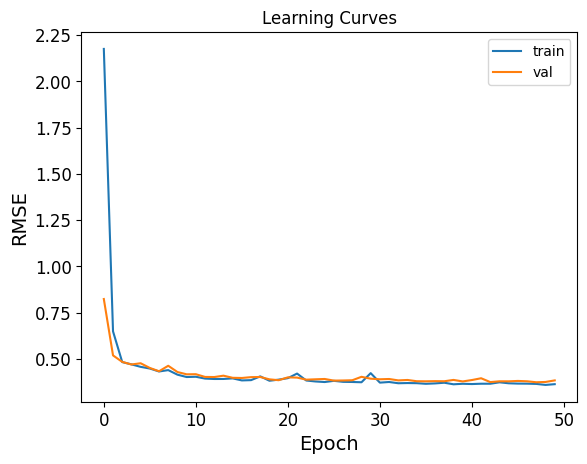

In [ ]:
from matplotlib import pyplot as plt
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.plot(np.sqrt(history2.history['loss']), label='train')
plt.plot(np.sqrt(history2.history['val_loss']), label='val')
plt.legend()
plt.show()

In [ ]:
keras.backend.clear_session() # clearing session
np.random.seed(42) # generating random see
tf.random.set_seed(42) # set.seed function helps reuse same set of random variables

In [ ]:
model3 = keras.models.Sequential()
model3.add(keras.Input(shape=(n_features,)))
model3.add(keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'))
model3.add(keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'))
model3.add(keras.layers.Dense(1))

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               20100     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 50301 (196.49 KB)
Trainable params: 50301 (196.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model3.compile(optimizer='adam', loss='mse')

In [ ]:
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/50
18226/18226 [==============================] - 50s 3ms/step - loss: 1.7087 - val_loss: 1.6417
Epoch 2/50
18226/18226 [==============================] - 51s 3ms/step - loss: 0.3824 - val_loss: 0.1960
Epoch 3/50
18226/18226 [==============================] - 49s 3ms/step - loss: 0.2006 - val_loss: 0.2104
Epoch 4/50
18226/18226 [==============================] - 49s 3ms/step - loss: 0.2078 - val_loss: 0.1734
Epoch 5/50
18226/18226 [==============================] - 50s 3ms/step - loss: 0.1659 - val_loss: 0.1496
Epoch 6/50
18226/18226 [==============================] - 51s 3ms/step - loss: 0.1540 - val_loss: 0.1418
Epoch 7/50
18226/18226 [==============================] - 54s 3ms/step - loss: 0.1348 - val_loss: 0.2765
Epoch 8/50
18226/18226 [==============================] - 51s 3ms/step - loss: 0.1582 - val_loss: 0.1339
Epoch 9/50
18226/18226 [==============================] - 55s 3ms/step - loss: 0.1331 - val_loss: 0.1311
Epoch 10/50
18226/18226 [==============================

In [ ]:
#print(history2_2.history['loss'][-1])
print('Train loss-->', np.sqrt(history3.history['loss'][-1]))
#print(history2_2.history['val_loss'][-1])
print('Validation loss-->', np.sqrt(history3.history['val_loss'][-1]))
loss3= model3.evaluate(X_test_tr, y_test)
rmse3 = np.sqrt(loss3)
print('Test RMSE-->', rmse3)

Train loss--> 0.3161848494551906
Validation loss--> 0.326680979613819
5334/5334 [==============================] - 10s 2ms/step - loss: 0.0992
Test RMSE--> 0.31499215833424954


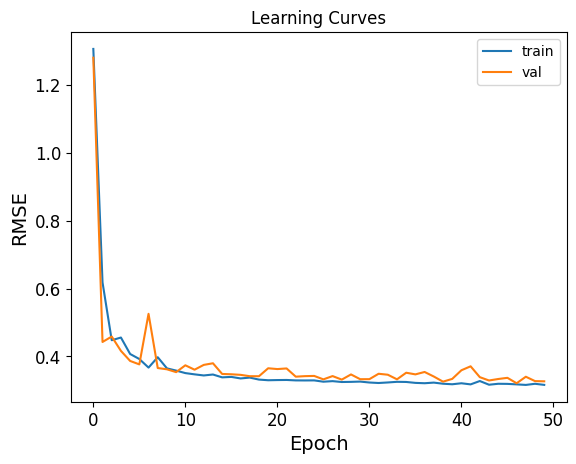

In [ ]:
from matplotlib import pyplot as plt
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.plot(np.sqrt(history3.history['loss']), label='train')
plt.plot(np.sqrt(history3.history['val_loss']), label='val')
plt.legend()
plt.show()

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               20100     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 50301 (196.49 KB)
Trainable params: 50301 (196.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


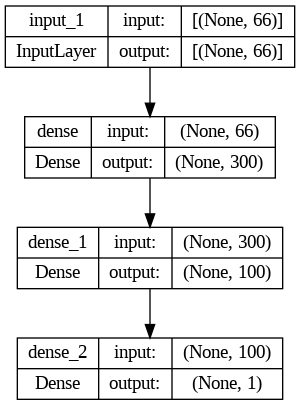

In [ ]:
keras.utils.plot_model(model3, 'model3.png', show_shapes=True)